# Solving Non Linear Problems And Decision Boundary Visulaization

# With SVM

In [1]:
import pandas as pd
import numpy as np
import sklearn

from sklearn.model_selection import train_test_split

In [2]:
# df = pd.read_csv('geoloc_elev.csv')
df = pd.read_csv('https://raw.githubusercontent.com/raqueeb/TensorFlow2/master/datasets/geoloc_elev.csv')

# আমাদের দুটো ফিচার হলেই যথেষ্ট 
X = df[['lat', 'lon']].values
y = df['target'].values
display(df)

,lat,lon,elev,source,target
0,0.106264,0.068264,0.542477,S,1
1,0.099569,0.132094,0.722289,C,1
2,-0.775751,-0.814161,0.214760,S,0
3,-0.159833,0.040773,0.478576,S,1
4,-0.096395,0.021420,0.270322,C,1
...,...,...,...,...,...
1495,1.371969,-0.051412,0.340901,C,0
1496,1.163256,-0.024625,0.001898,S,0
1497,1.347938,0.020778,0.608316,Q,0
1498,1.266060,-0.016751,1.674323,Q,0


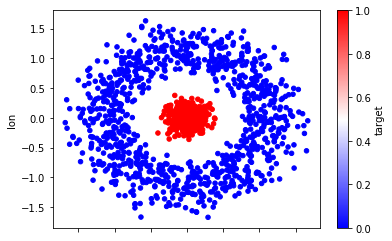

In [3]:
df.plot(kind='scatter',
        x='lat',
        y='lon',
        c='target',
        cmap='bwr');

In [4]:
# এখানে সাপোর্ট ভেক্টর মেশিন ব্যবহার করছি
from sklearn.svm import SVC

clf = SVC(gamma='auto')
clf.fit(X, y)

SVC(gamma='auto')

In [5]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC(gamma='auto')

In [6]:
# প্লটিং এর কিছু লাইব্রেরি ব্যবহার করছি, plot_decision_regions লাইব্রেরিটা বেশ ভালো
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [7]:
#!pip install mlxtend

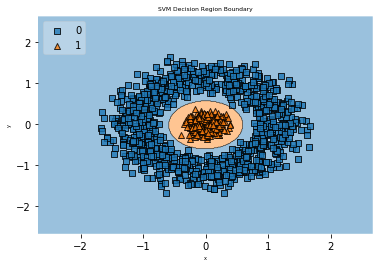

In [8]:
plot_decision_regions(X=X, y=y, clf=clf, legend=2)
plt.xlabel("x", size=5)
plt.ylabel("y", size=5)
plt.title('SVM Decision Region Boundary', size=6)
plt.show()

# With Logistic Regression

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size = 0.3, random_state=0)

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

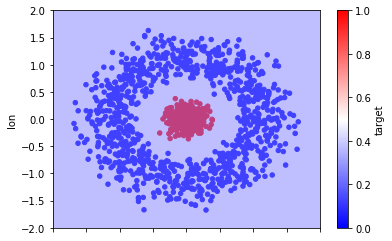

In [11]:
hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

c = lr.predict(ab)
cc = c.reshape(aa.shape)

ax = df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
ax.contourf(aa, bb, cc, cmap='bwr', alpha=0.5)

# With Neural Network

In [12]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, input_dim=2, activation='tanh'),
    # এই লেয়ার পরে যোগ করে আমরা দেখবো 
    # tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(tf.keras.optimizers.SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
h = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20


/home/nsl48/anaconda3/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


30/30 [==============================] - 0s 4ms/step - loss: 0.6572 - accuracy: 0.6042 - val_loss: 0.6349 - val_accuracy: 0.6381
Epoch 2/20
30/30 [==============================] - 0s 1ms/step - loss: 0.6042 - accuracy: 0.6582 - val_loss: 0.5672 - val_accuracy: 0.6381
Epoch 3/20
30/30 [==============================] - 0s 1ms/step - loss: 0.5193 - accuracy: 0.6899 - val_loss: 0.4739 - val_accuracy: 0.8762
Epoch 4/20
30/30 [==============================] - 0s 1ms/step - loss: 0.4260 - accuracy: 0.8529 - val_loss: 0.4033 - val_accuracy: 0.8952
Epoch 5/20
30/30 [==============================] - 0s 993us/step - loss: 0.3676 - accuracy: 0.8804 - val_loss: 0.3497 - val_accuracy: 0.8857
Epoch 6/20
30/30 [==============================] - 0s 991us/step - loss: 0.3353 - accuracy: 0.8794 - val_loss: 0.3217 - val_accuracy: 0.8762
Epoch 7/20
30/30 [==============================] - 0s 995us/step - loss: 0.3122 - accuracy: 0.8751 - val_loss: 0.3071 - val_accuracy: 0.8857
Epoch 8/20
30/30 [=======

(101, 101)
(101, 101)
(10201,)
(10201,)
319/319 [==============================] - 0s 386us/step
[[1.0977175e-05]
 [1.0911856e-05]
 [1.0857381e-05]
 ...
 [3.3196125e-02]
 [3.3209801e-02]
 [3.3223506e-02]]


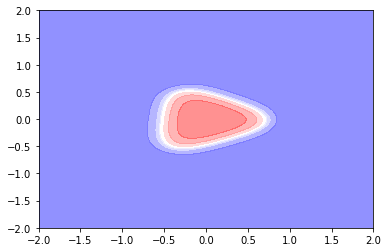

In [14]:
hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
print(aa.shape)
print(bb.shape)
print(aa.ravel().shape)
print(bb.ravel().shape)
ab = np.c_[aa.ravel(), bb.ravel()]

c = model.predict(ab)
print(c)
cc = c.reshape(aa.shape)

#ax = df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.5)
plt.show()